In [1]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read data
players = pd.read_csv('https://storage.googleapis.com/big-data-bowl/players.csv')
plays = pd.read_csv('https://storage.googleapis.com/big-data-bowl/plays.csv')

week1 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week1.csv')
week2 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week2.csv')
week3 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week3.csv')
week4 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week4.csv')
week5 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week5.csv')
week6 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week6.csv')
week7 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week7.csv')
week8 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week8.csv')

tracking = week1.append([
    week2,
    week3,
    week4,
    week5,
    week6,
    week7,
    week8,
])

In [53]:
# Slice tracking data for football position
football_tracking = tracking[tracking['team'] == 'football']

In [54]:
# Slice football tracking data for first frame
football_start_tracking = football_tracking[football_tracking['frameId'] == 1]

In [55]:
# Get QB tracking data
position_tracking = tracking.merge(players[['nflId', 'officialPosition']], how='inner')
qb_tracking = position_tracking[position_tracking['officialPosition'] == 'QB']

In [57]:
# Slice for QB possession frames

# Set football possession threshold
fb_possession_threshold = 1

# Merge football position by frame
fb_rel = qb_tracking[['gameId', 'playId', 'frameId', 'nflId', 'x', 'y']].merge(
    football_tracking[['gameId', 'playId', 'frameId', 'x', 'y']],
    on=['gameId', 'playId', 'frameId'],
    suffixes=('', '_fb')
)

# Normalize player coordinates
fb_rel['x_rel'] = fb_rel['x_fb'] - fb_rel['x']
fb_rel['y_rel'] = fb_rel['y_fb'] - fb_rel['y']

# Get QB tracking data
fb_rel = fb_rel.merge(players[['nflId', 'officialPosition']], how='inner')
qb_fb_rel = fb_rel[fb_rel['officialPosition'] == 'QB']

# Normalize X distance
qb_fb_rel['x_rel'] = qb_fb_rel['x_rel'].apply(lambda x: abs(x))

qb_tracking_possession = qb_fb_rel[qb_fb_rel['x_rel'] <= fb_possession_threshold]


In [58]:
# Merge in Football start position
qb_coords = qb_tracking_possession[['gameId', 'playId', 'frameId', 'x', 'y']].merge(
    football_start_tracking[['gameId', 'playId', 'x', 'y']],
    on=['gameId', 'playId'],
    suffixes=('', '_start')
)

In [60]:
# Normalize position data to football start
qb_coords['x_rel'] = qb_coords['x_start'] - qb_coords['x']
qb_coords['y_rel'] = qb_coords['y_start'] - qb_coords['y']

qb_coords['x_rel'] = qb_coords['x_rel'].apply(lambda x: abs(x))

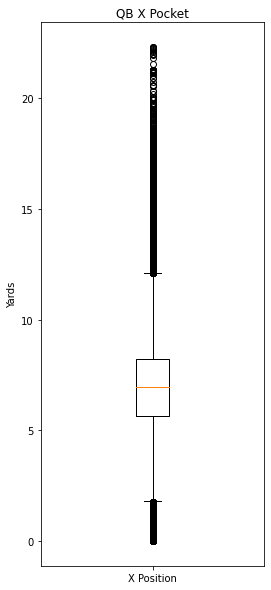

In [72]:
# Plot X position distributions
plt.figure(figsize=(4, 10))
plt.boxplot(qb_coords['x_rel'], labels=['X Position']) 
plt.ylabel('Yards')
plt.title('QB X Pocket')
plt.show()

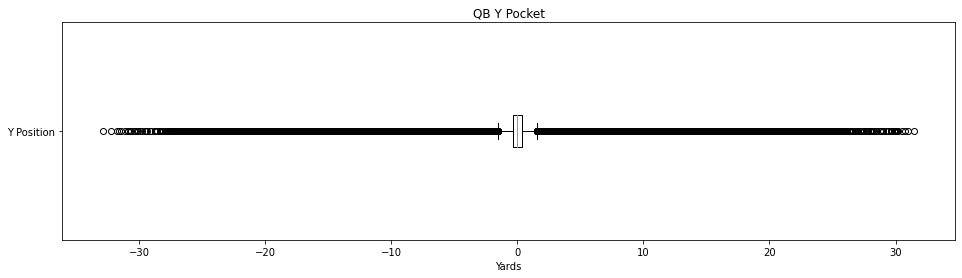

In [70]:
# Plot X position distributions
plt.figure(figsize=(16, 4))
plt.boxplot(qb_coords['y_rel'], labels=['Y Position'], vert = 0)

plt.xlabel('Yards')
plt.title('QB Y Pocket')
plt.show()